# Research Methods 
## Bootstraping and randomization

**11. December 2017**

Fabian Karl & Robert Brown

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import scipy.optimize as opt
from random import shuffle

import matplotlib.pyplot as plt

## randomization

In [3]:
df = pd.read_csv('CaffeineTaps.csv', thousands=',')

In [4]:
caffeine_group = df[df.Group == 'Caffeine']
no_caffeine_group = df[df.Group != 'Caffeine']

H0: the two groups 'Caffeine' and 'noCaffeine' have no siginificant difference regarding 'Taps'

H1: the two groups 'Caffeine' and 'noCaffeine' have a siginificant difference regarding 'Taps'

In [5]:
no_caffeine_group_median = no_caffeine_group.Taps.median()
caffeine_group_median = caffeine_group.Taps.median()

In [6]:
diff_in_median = caffeine_group_median - no_caffeine_group_median
print('Difference in Median:',diff_in_median)

Difference in Median: 3.5


In [7]:
def shuffel_split_get_median(sample_list, samples = 1000):
    for _ in range(samples):
        shuffle(sample_list)
        halfe_size = int(len(sample_list)/2)
        first_half = sample_list[:halfe_size]
        second_half = sample_list[halfe_size:]
        median_first_half = np.median(first_half)
        median_second_half = np.median(second_half)
        yield median_second_half-median_first_half

## 100 Samples

In [20]:
n = 100
taps = list(df.Taps)
median_list = list(shuffel_split_get_median(taps, n))
bigger_than_original = sum(i >= diff_in_median for i in median_list)
print('From',n,'ramdom runs,',bigger_than_original,'runs had a bigger difference in Median than',diff_in_median )
print('p-value:',bigger_than_original/n)

From 100 ramdom runs, 1 runs had a bigger difference in Median than 3.5
p-value: 0.01


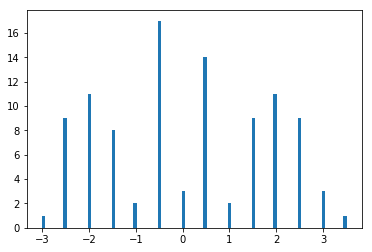

In [19]:
plt.hist(median_list,n)
plt.show()

## 10,000 Samples

In [24]:
n = 10000
taps = list(df.Taps)
median_list = list(shuffel_split_get_median(taps, n))
bigger_than_original = sum(i >= diff_in_median for i in median_list)
print('From',n,'ramdom runs,',bigger_than_original,'runs had a bigger difference in Median than',diff_in_median )
print('p-value:',bigger_than_original/n)

From 10000 ramdom runs, 72 runs had a bigger difference in Median than 3.5
p-value: 0.0072


In [ ]:
plt.hist(median_list,n)
plt.show()

H0 has to be rejected -> There is a significant difference (p-value of 0.0072) between the two groups 'Caffeine' and 'noCaffeine' regarding 'Taps'